In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import dcor
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
#============== 여백
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))



In [57]:
df_red = pd.read_csv("chapter04_winequality_red.csv", sep=';')
df_white = pd.read_csv("chapter04_winequality_white.csv", sep=';')

In [58]:
df_red['sort'] = 'red'
df_red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality sort  
0         9.4        5  red  
1         9.8        5  red  
2         9.8        5  red  
3         9.8        6  red  
4         9.4        5  red  
...       ...      ...  ...  
1594     10.5        5  red  
1595     11.2        6  red  
1596     11.0        6  red  
1597     10.2        5  red  
1598     11.0        6  red  

[1599 rows x 13 columns]

In [59]:
df_white['sort'] = 'white'
df_white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   sort  
0         8.8        6  white  
1         9.5        6  white  
2        10.1        6  white  
3         9.9        6  white  
4         9.9        6  white  
...       ...      ...    ...  
4893     11.2        6  white  
4894      9.6        5  white  
4895      9.4        6  white  
4896     12.8        7  white  
4897     11.8        6  white  

[4898 rows x 13 columns]

In [65]:
df_merge = pd.concat([df_red, df_white], axis=0)

df_merge = df.drop('sort', axis=1)
df_merge['quality'].value_counts().sort_index()

df_merge['quality'] = np.where(df_merge['quality'] < 6, 1,
                              np.where(df_merge['quality'] < 8, 2, 3))

df_merge['quality'].value_counts()


quality
2    3915
1    2384
3     198
Name: count, dtype: int64

In [66]:
df_merge

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
3         9.8        2  
4         9.4        1  
...       ...      ...  
6492     11.2        2  
6493      9.6        1  
6494      9.4        2  
6495     12.8        2  
6496     11.8        2  

[6497 rows x 12 columns]

In [67]:
df = df_merge
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
3         9.8        2  
4         9.4        1  
...       ...      ...  
6492     11.2        2  
6493      9.6        1  
6494      9.4        2  
6495     12.8        2  
6496     11.8        2  

[6497 rows x 12 columns]

In [24]:
df.groupby(['sort', 'quality'])['quality'].count()

sort   quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: quality, dtype: int64

In [25]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [27]:
df_numeric = df.drop('sort', axis=1)
df_numeric.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed acidity        -0.095452 -0.076743  
volatile acidity     -0.037640 -0.265699  
citric acid          -0.010493  0.085532  
residual sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

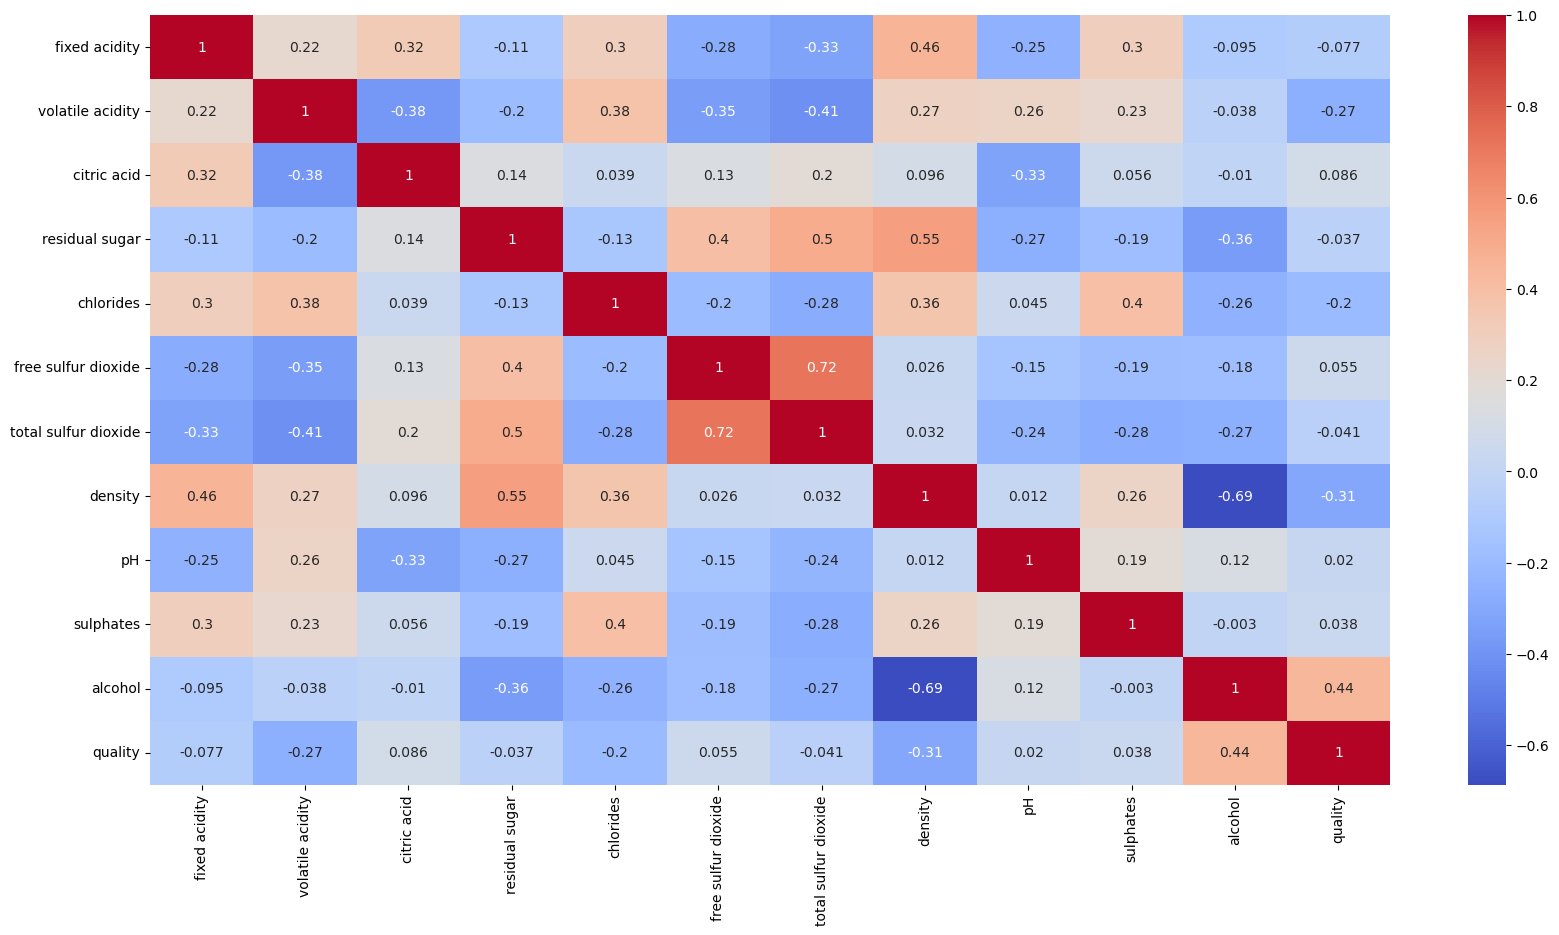

In [31]:
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

plt.gcf().set_size_inches(20,10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


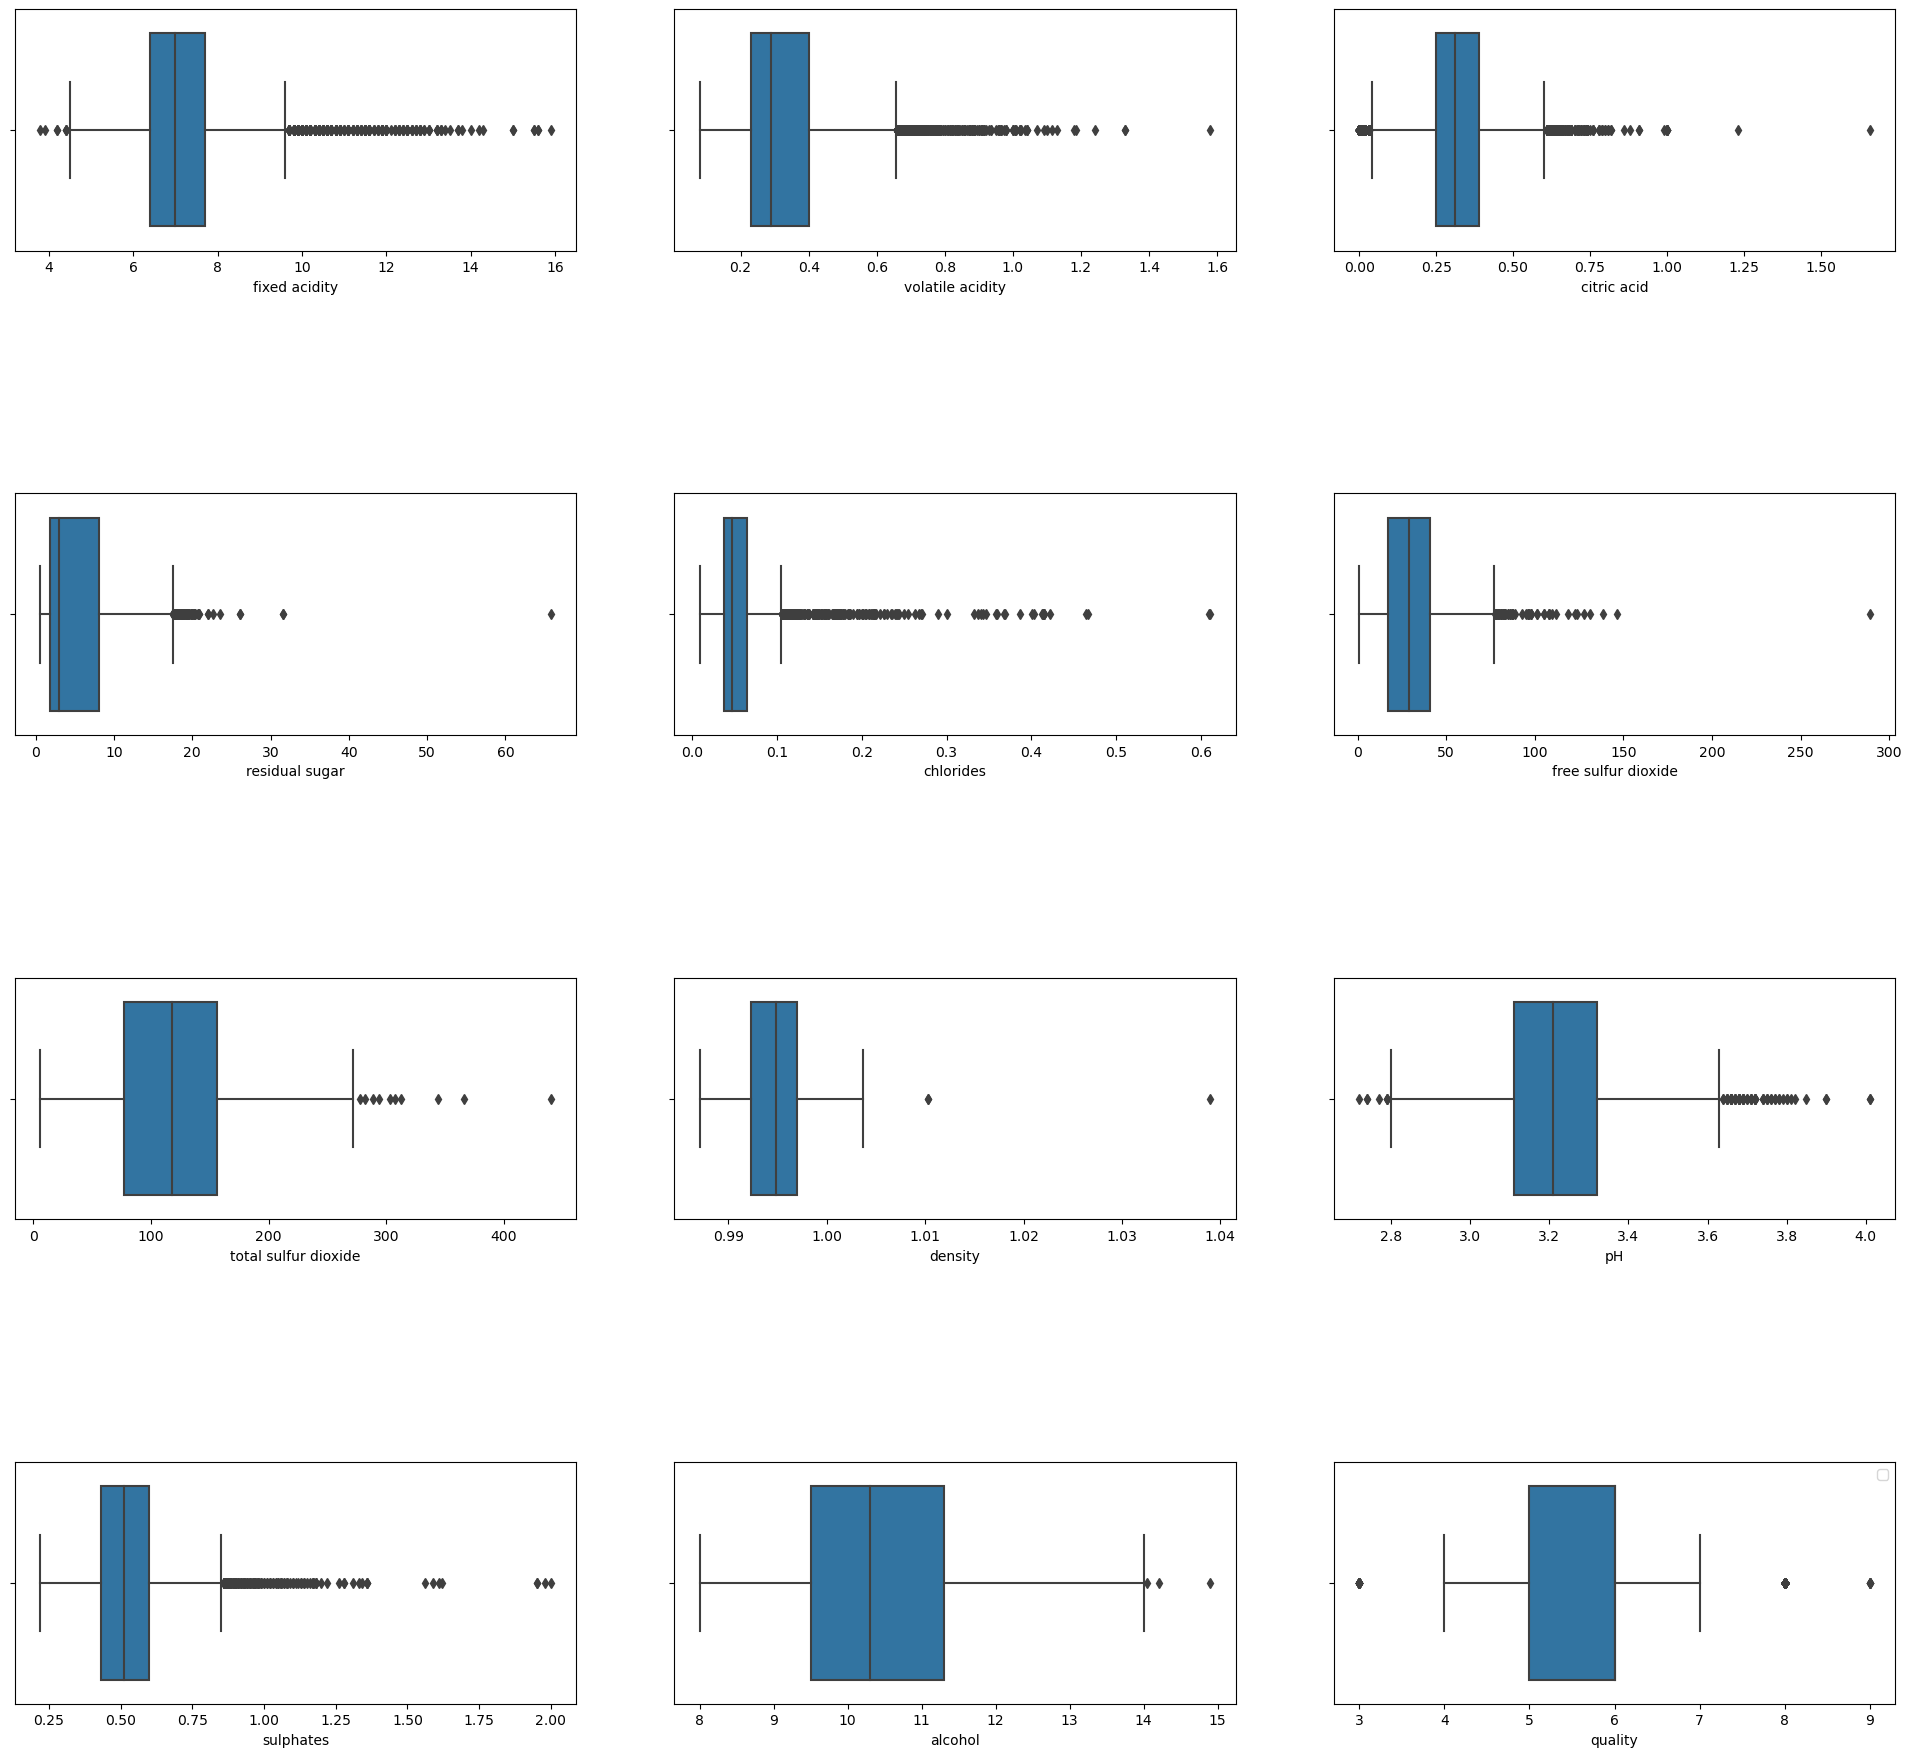

In [42]:
fig, axes = plt.subplots(4,3)

for i, col in enumerate(df_numeric.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df_numeric[col])
    
plt.legend()
plt.tight_layout()
plt.gcf().set_size_inches(20,20)
plt.show()
    

In [39]:
df_numeric.shape

(6497, 12)

In [43]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   sort  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

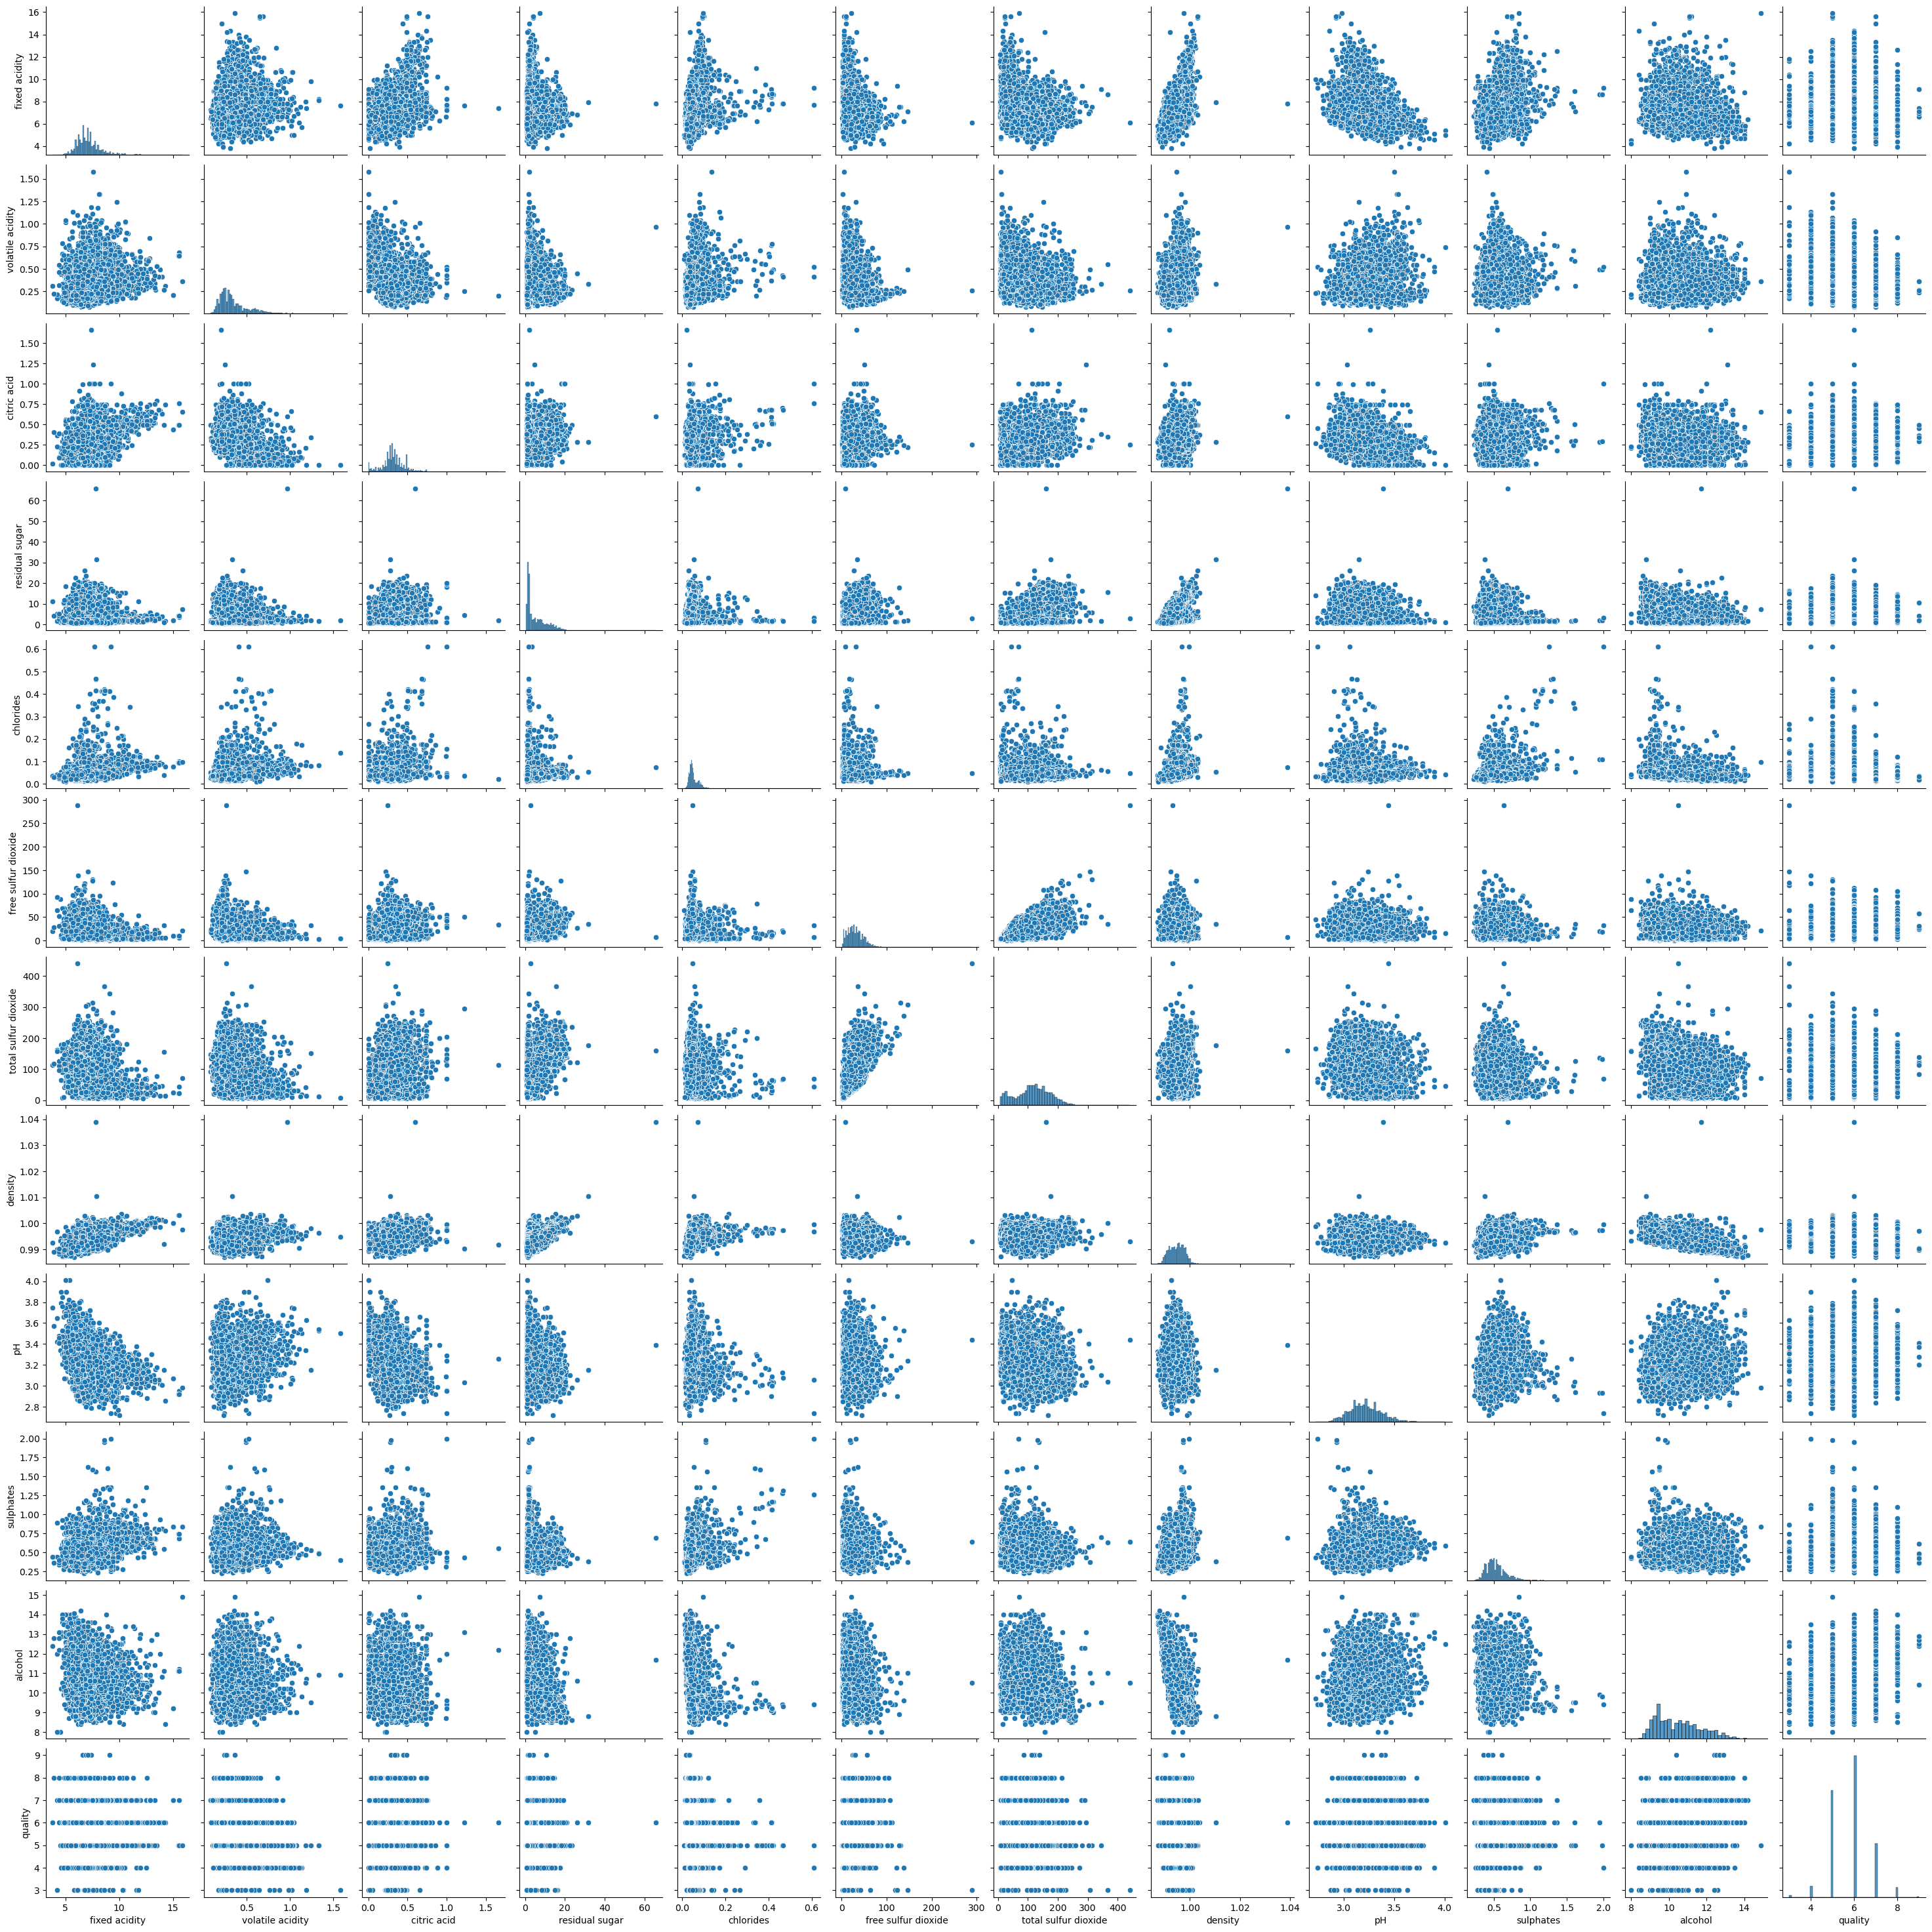

In [44]:
sns.pairplot(df_numeric)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


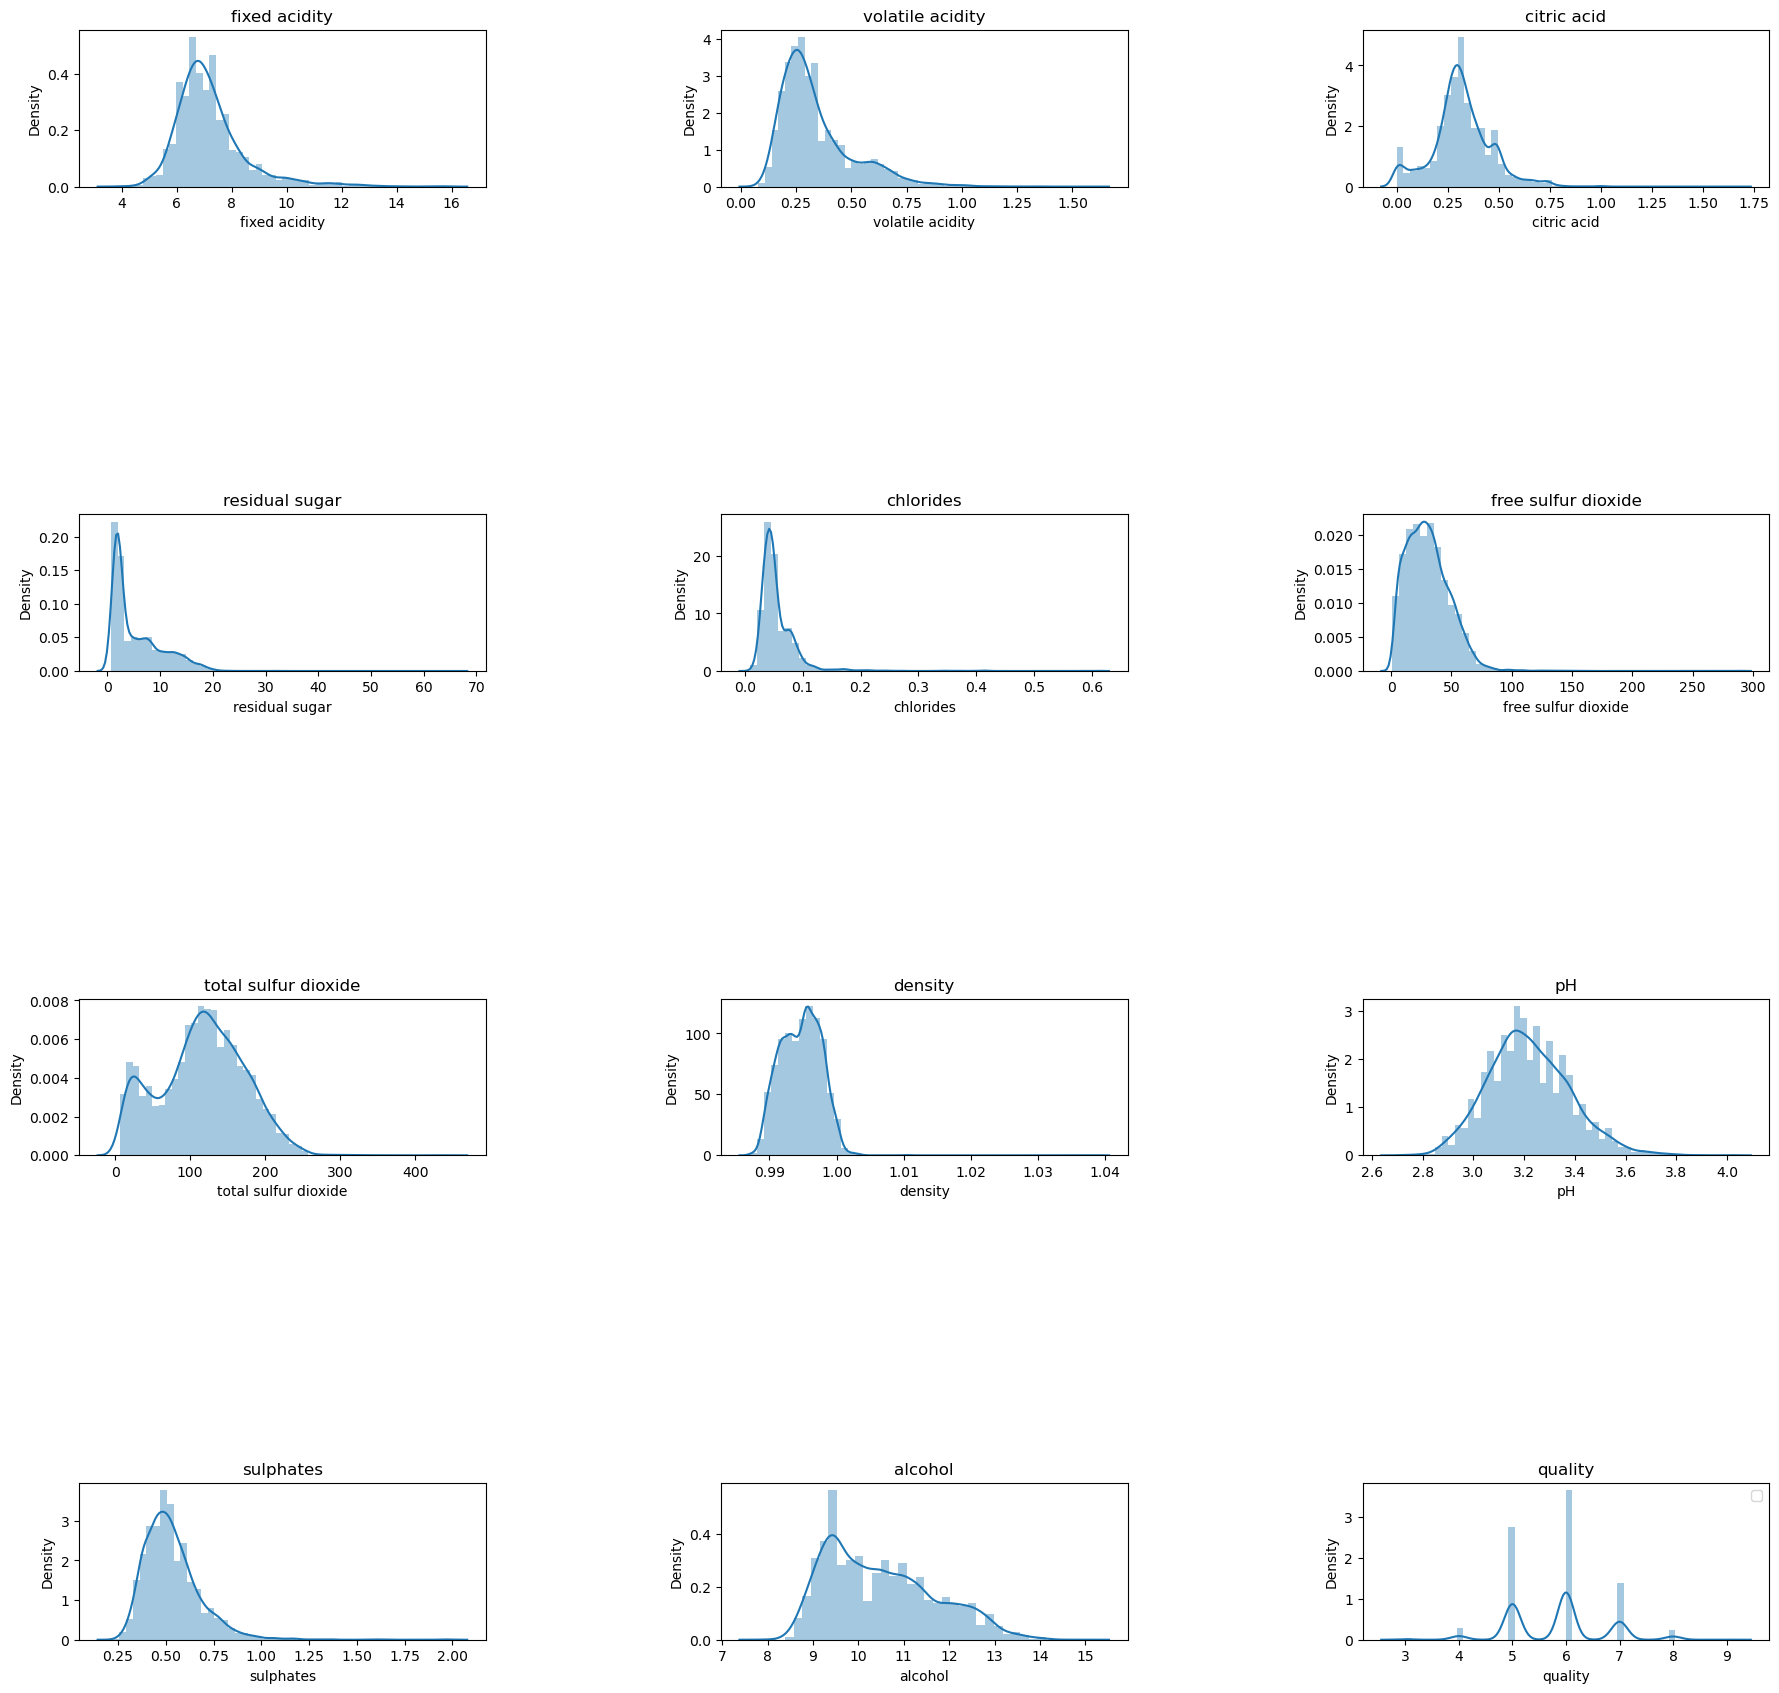

In [49]:
fig, axes = plt.subplots(4,3)

for i, col in enumerate(df_numeric.columns):
    plt.subplot(4,3,i+1)
    sns.distplot(df_numeric[col])
    plt.title(col)
    
plt.legend()
plt.tight_layout()
plt.gcf().set_size_inches(20,20)
plt.show()

In [50]:
df_merge

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   sort  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
4893     11.2        6  white  
4894      9.6        5  white  
4895      9.4        6  white  
4896     12.8        7  white  
4897     11.8        6  white  

[6497 rows x 13 columns]

In [92]:
pca.explained_variance_ratio_.cumsum()

array([0.25346226, 0.47428343, 0.61107566, 0.70012777, 0.77016947,
       0.82520274, 0.87218827, 0.91518684, 0.95338453, 0.97830228,
       0.9972679 , 1.        ])

In [96]:
len(explained_variance_ratio_cumsum[explained_variance_ratio_cumsum < a])

5

누적 설명된 분산(Cumulative Explained Variance):
[0.25342416 0.47285994 0.60876049 0.69727269 0.76806372 0.82326577
 0.87102652 0.91408737 0.95309862 0.97830117 0.99726574 1.        ]
적합한 주성분 개수: 6
pca.explained_variance_
[3.04155802 2.63363474 1.63105765 1.06230991 0.84962312 0.66252665
 0.57321716 0.51680983 0.46820699 0.30247723 0.22760984 0.03281615]


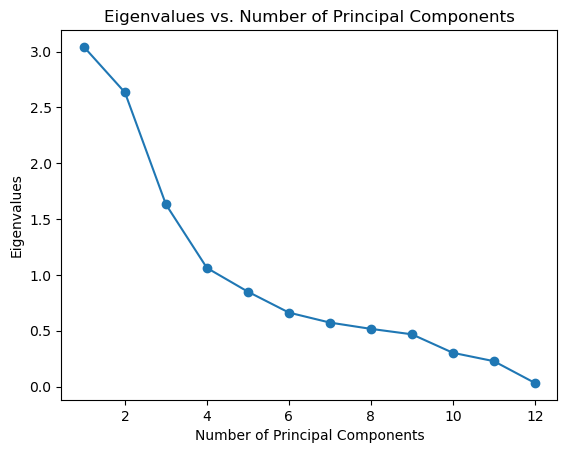

pca.explained_variance_ratio_
[0.25342416 0.21943578 0.13590055 0.0885122  0.07079103 0.05520206
 0.04776074 0.04306086 0.03901124 0.02520256 0.01896457 0.00273426]
explained_variance_ratio_cumsum
[0.25342416 0.47285994 0.60876049 0.69727269 0.76806372 0.82326577
 0.87102652 0.91408737 0.95309862 0.97830117 0.99726574 1.        ]


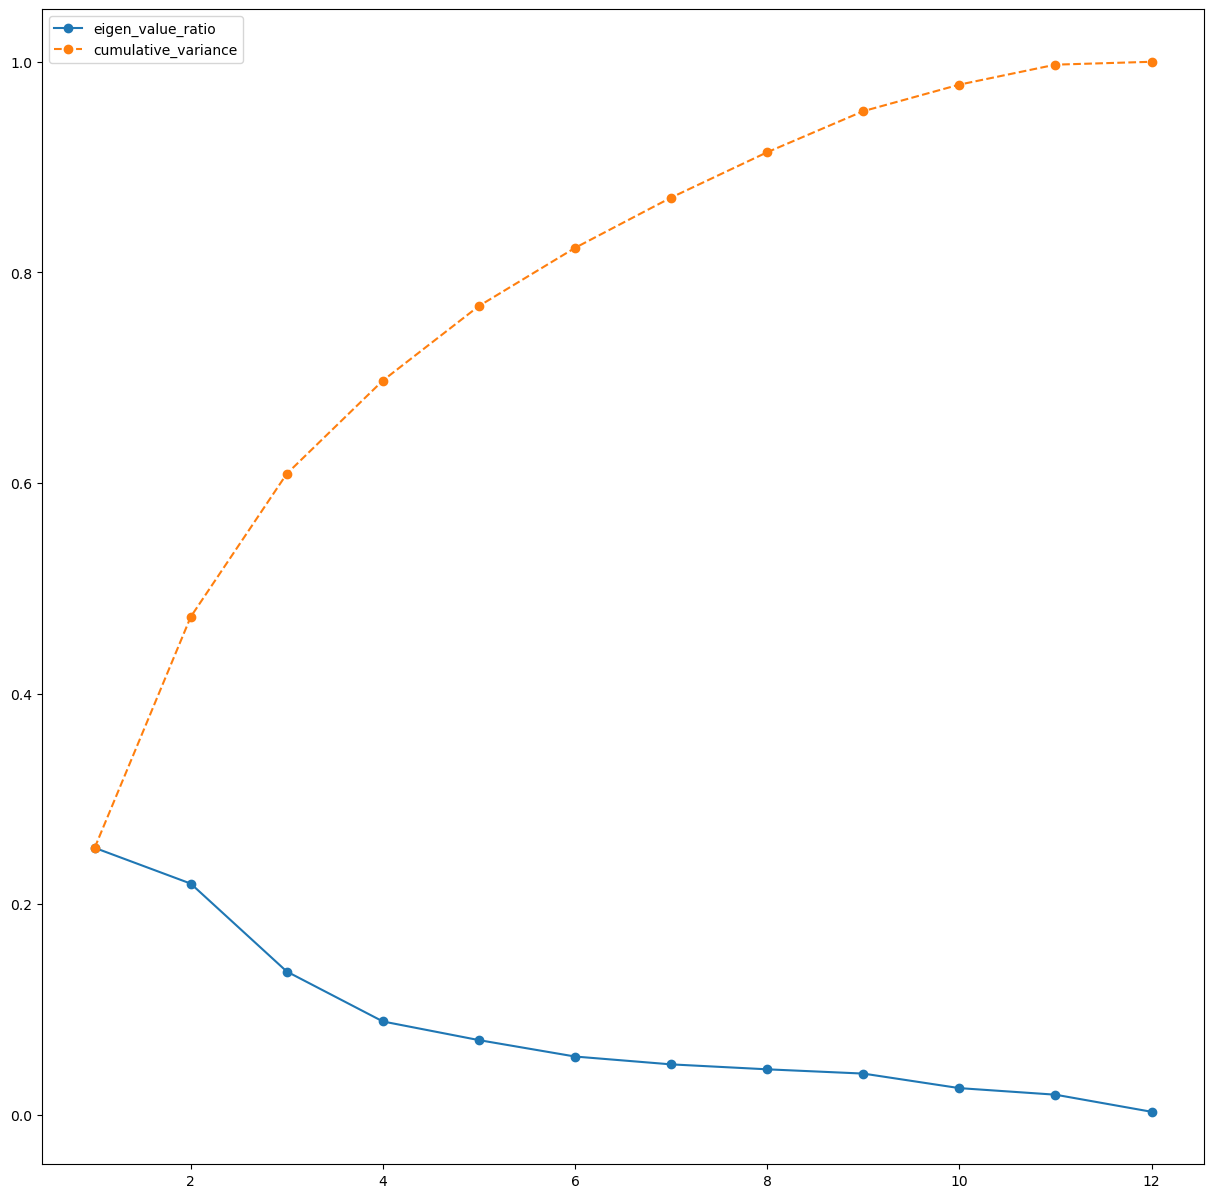

In [148]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_merge)
pca = PCA()

pca.fit(scaled_data)

explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()

a = 0.80

optimal_num_components = len(explained_variance_ratio_cumsum[explained_variance_ratio_cumsum < a]) + 1

# 결과 출력
print("누적 설명된 분산(Cumulative Explained Variance):")
print(explained_variance_ratio_cumsum)
print(f"적합한 주성분 개수: {optimal_num_components}")
print('====================================================================')

# Plot eigenvalues
print('pca.explained_variance_')
print(pca.explained_variance_)
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues vs. Number of Principal Components')
plt.show()

print('====================================================================')
# Plot explained variance ratio
print('pca.explained_variance_ratio_')
print(pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-', label='eigen_value_ratio')
# Plot cumulative explained variance
print('explained_variance_ratio_cumsum')
print(explained_variance_ratio_cumsum)
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o', linestyle='--', label='cumulative_variance')

plt.legend()
plt.gcf().set_size_inches(15,15)
plt.show()


In [98]:
pca_result

array([[-3.34843817,  0.56892617],
       [-3.22859545,  1.19733465],
       [-3.23746833,  0.95258001],
       ...,
       [ 0.62692235, -0.62214478],
       [ 0.49193416, -3.75592792],
       [ 0.76155534, -2.7678397 ]])

PCA 주성분 설명된 분산의 비율:
[0.25346226 0.22082117]
PCA로 변환된 데이터:
           PC1       PC2
0    -3.348438  0.568926
1    -3.228595  1.197335
2    -3.237468  0.952580
3    -1.672561  1.600583
4    -3.348438  0.568926
...        ...       ...
6492  0.112718 -1.912247
6493  1.720296  1.009571
6494  0.626922 -0.622145
6495  0.491934 -3.755928
6496  0.761555 -2.767840

[6497 rows x 2 columns]


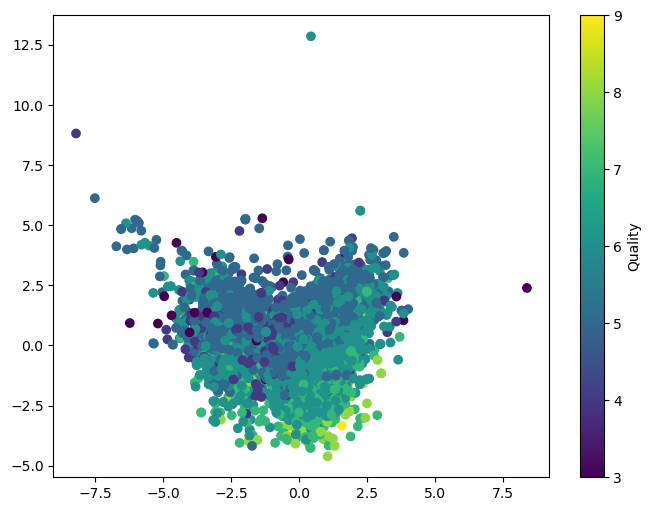

In [97]:
# PCA 모델 생성 및 주성분 개수 지정
pca = PCA(n_components=2)  # 주성분 개수를 2로 지정 (원하는 주성분 개수로 변경 가능)

# 데이터에 PCA 모델 적용
pca_result = pca.fit_transform(scaled_data)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# 주성분 분석 결과 출력
print("PCA 주성분 설명된 분산의 비율:")
print(pca.explained_variance_ratio_)

# 주성분(PC1, PC2)으로 변환된 데이터 출력
print("PCA로 변환된 데이터:")
print(pca_df)

# 주성분(PC1, PC2) 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df_merge['quality'], cmap='viridis')
plt.colorbar(label='Quality')
plt.show()


In [80]:
scaled_data

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [60]:
pca_result

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[6497 rows x 12 columns]

In [112]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [121]:
df_merge = df.drop('sort', axis=1)

In [12]:
df_merge = df.drop('sort', axis=1)
df_merge['quality'].value_counts().sort_index()

df_merge['quality'] = np.where(df_merge['quality'] < 6, 1,
                              np.where(df_merge['quality'] < 8, 2, 3))

df_merge['quality'].value_counts()

quality
2    3915
1    2384
3     198
Name: count, dtype: int64

In [123]:
df1 = df_merge[df_merge['quality'] == 1]
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
4               7.4              0.70         0.00             1.9      0.076   
5               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6481            5.5              0.32         0.13             1.3      0.037   
6483            6.5              0.33         0.38             8.3      0.048   
6487            6.8              0.22         0.36             1.2      0.052   
6491            6.5              0.23         0.38             1.3      0.032   
6493            6.6              0.32         0.36             8.0      0.047   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6481                 45.0                 156.0  0.99184  3.26       0.38   
6483                 68.0                 174.0  0.99492  3.14       0.50   
6487                 38.0                 127.0  0.99330  3.04       0.54   
6491                 29.0                 112.0  0.99298  3.29       0.54   
6493                 57.0                 168.0  0.99490  3.15       0.46   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
4         9.4        1  
5         9.4        1  
...       ...      ...  
6481     10.7        1  
6483      9.6        1  
6487      9.2        1  
6491      9.7        1  
6493      9.6        1  

[2384 rows x 12 columns]

In [128]:
scal = StandardScaler()
df_scal = scal.fit(df1).transform(df1)

In [129]:
df_scal

array([[ 0.05520584,  1.61010915, -1.86724984, ...,  0.24858333,
        -0.56269237,  0.        ],
       [ 0.37063001,  2.56790508, -1.86724984, ...,  1.08345911,
        -0.0873897 ,  0.        ],
       [ 0.37063001,  1.92937446, -1.62170272, ...,  0.87474017,
        -0.0873897 ,  0.        ],
       ...,
       [-0.4179304 , -0.94401333,  0.34267418, ...,  0.10943737,
        -0.80034371,  0.        ],
       [-0.65449852, -0.89080244,  0.46544774, ...,  0.10943737,
        -0.20621537,  0.        ],
       [-0.57564248, -0.41190448,  0.34267418, ..., -0.44714649,
        -0.32504104,  0.        ]])

In [130]:
pca = PCA()

pca.fit(df_scal)

PCA()

[3.04155802 2.63363474 1.63105765 1.06230991 0.84962312 0.66252665
 0.57321716 0.51680983 0.46820699 0.30247723 0.22760984 0.03281615]
[0.25342416 0.21943578 0.13590055 0.0885122  0.07079103 0.05520206
 0.04776074 0.04306086 0.03901124 0.02520256 0.01896457 0.00273426]
[0.25342416 0.47285994 0.60876049 0.69727269 0.76806372 0.82326577
 0.87102652 0.91408737 0.95309862 0.97830117 0.99726574 1.        ]


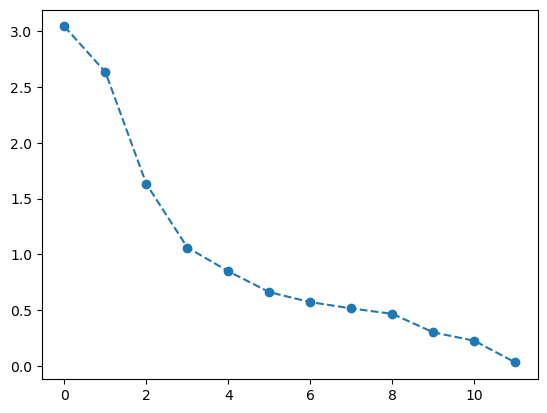

In [155]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())


plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_, linestyle='--', marker='o')

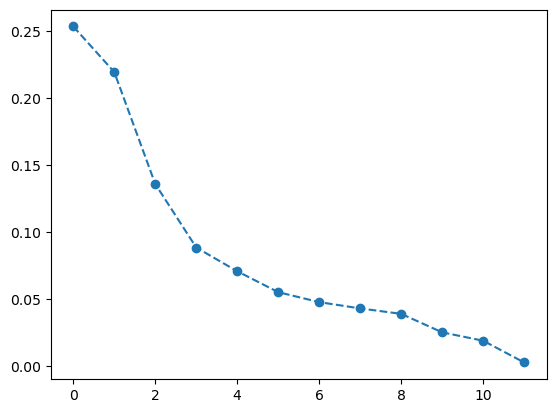

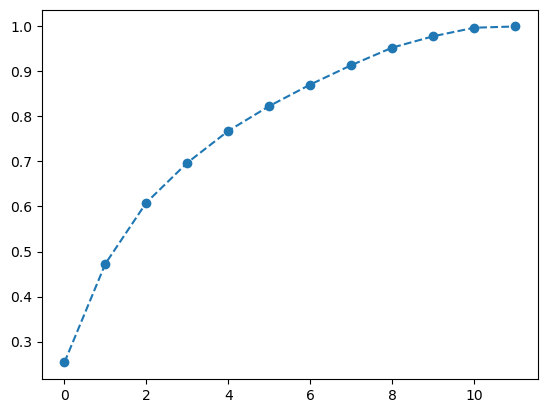

In [159]:
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, linestyle='--', marker='o')
plt.show()
plt.plot(range(len(pca.explained_variance_ratio_.cumsum())), pca.explained_variance_ratio_.cumsum(), linestyle='--', marker='o')

In [161]:
pca = PCA(n_components=2)

pca.fit(df_scal)

PCA(n_components=2)

In [173]:
pca_result = pd.DataFrame(pca.transform(df_scal), columns = ['pc1', 'pc2'])
pca_result['quality'] = 1
pca_result

pc1       pc2  quality
0    -2.839900  0.446147        1
1    -2.541895  1.071394        1
2    -2.601232  0.863667        1
3    -2.839900  0.446147        1
4    -2.674377  0.393915        1
...        ...       ...      ...
2379  0.317477 -2.909383        1
2380  2.100217 -0.307898        1
2381  0.800129 -0.687934        1
2382  0.112874 -1.360074        1
2383  1.812744 -0.458916        1

[2384 rows x 3 columns]

<Axes: xlabel='pc1', ylabel='pc2'>

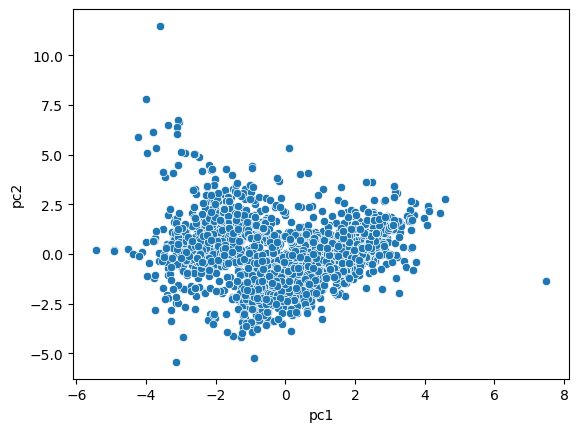

In [169]:
sns.scatterplot(x=pca_result['pc1'], y=pca_result['pc2'], hue='')

In [175]:
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
4               7.4              0.70         0.00             1.9      0.076   
5               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6481            5.5              0.32         0.13             1.3      0.037   
6483            6.5              0.33         0.38             8.3      0.048   
6487            6.8              0.22         0.36             1.2      0.052   
6491            6.5              0.23         0.38             1.3      0.032   
6493            6.6              0.32         0.36             8.0      0.047   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6481                 45.0                 156.0  0.99184  3.26       0.38   
6483                 68.0                 174.0  0.99492  3.14       0.50   
6487                 38.0                 127.0  0.99330  3.04       0.54   
6491                 29.0                 112.0  0.99298  3.29       0.54   
6493                 57.0                 168.0  0.99490  3.15       0.46   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
4         9.4        1  
5         9.4        1  
...       ...      ...  
6481     10.7        1  
6483      9.6        1  
6487      9.2        1  
6491      9.7        1  
6493      9.6        1  

[2384 rows x 12 columns]

In [3]:
df1 = pd.merge(df1, pca_result, on='quality', how='left')
df1

NameError: name 'pd' is not defined

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
data = df1
data['quality'][0]

1

In [41]:
def pca(data):
    df_scal = StandardScaler().fit(data).transform(data)
    df_scal
    pca = PCA(n_components=2)
    pca
    pca_result = pca.fit(df_scal).transform(df_scal)
    pca_result = pd.DataFrame(pca_result, columns = ['pc1', 'pc2'])
    pca_result
    pca_result['quality'] = data['quality'][0]
    pca_result
    data = pd.merge(data, pca_result, on='quality', how='left') 
    return data

In [18]:
df_merge = df_merge.drop('sort', axis=1)
df1 = df_merge[df_merge['quality'] == 1]

KeyError: "['sort'] not found in axis"

In [ ]:
df1

In [42]:
pca(df1)

fixed acidity  volatile acidity  citric acid  residual sugar  \
0                  7.4              0.70         0.00             1.9   
1                  7.4              0.70         0.00             1.9   
2                  7.4              0.70         0.00             1.9   
3                  7.4              0.70         0.00             1.9   
4                  7.4              0.70         0.00             1.9   
...                ...               ...          ...             ...   
5683451            6.6              0.32         0.36             8.0   
5683452            6.6              0.32         0.36             8.0   
5683453            6.6              0.32         0.36             8.0   
5683454            6.6              0.32         0.36             8.0   
5683455            6.6              0.32         0.36             8.0   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0            0.076                 11.0                  34.0   0.9978  3.51   
1            0.076                 11.0                  34.0   0.9978  3.51   
2            0.076                 11.0                  34.0   0.9978  3.51   
3            0.076                 11.0                  34.0   0.9978  3.51   
4            0.076                 11.0                  34.0   0.9978  3.51   
...            ...                  ...                   ...      ...   ...   
5683451      0.047                 57.0                 168.0   0.9949  3.15   
5683452      0.047                 57.0                 168.0   0.9949  3.15   
5683453      0.047                 57.0                 168.0   0.9949  3.15   
5683454      0.047                 57.0                 168.0   0.9949  3.15   
5683455      0.047                 57.0                 168.0   0.9949  3.15   

         sulphates  alcohol  quality       pc1       pc2  
0             0.56      9.4        1 -2.839900  0.446147  
1             0.56      9.4        1 -2.541895  1.071394  
2             0.56      9.4        1 -2.601232  0.863667  
3             0.56      9.4        1 -2.839900  0.446147  
4             0.56      9.4        1 -2.674377  0.393915  
...            ...      ...      ...       ...       ...  
5683451       0.46      9.6        1  0.317477 -2.909383  
5683452       0.46      9.6        1  2.100217 -0.307898  
5683453       0.46      9.6        1  0.800129 -0.687934  
5683454       0.46      9.6        1  0.112874 -1.360074  
5683455       0.46      9.6        1  1.812744 -0.458916  

[5683456 rows x 14 columns]

In [43]:
df_merge

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
3         9.8        2  
4         9.4        1  
...       ...      ...  
4893     11.2        2  
4894      9.6        1  
4895      9.4        2  
4896     12.8        2  
4897     11.8        2  

[6497 rows x 12 columns]

In [50]:
def pca(data, quality):
    data = df_merge[df_merge['quality'] == quality]
    df_scal = StandardScaler().fit(data).transform(data)
    df_scal
    pca = PCA(n_components=2)
    pca
    pca_result = pca.fit(df_scal).transform(df_scal)
    pca_result = pd.DataFrame(pca_result, columns = ['pc1', 'pc2'])
    pca_result
    pca_result['quality'] = data['quality'][0]
    pca_result
    data = pd.merge(data, pca_result, on='quality', how='left') 
    return data

In [51]:
pca(df_merge, 1)

fixed acidity  volatile acidity  citric acid  residual sugar  \
0                  7.4              0.70         0.00             1.9   
1                  7.4              0.70         0.00             1.9   
2                  7.4              0.70         0.00             1.9   
3                  7.4              0.70         0.00             1.9   
4                  7.4              0.70         0.00             1.9   
...                ...               ...          ...             ...   
5683451            6.6              0.32         0.36             8.0   
5683452            6.6              0.32         0.36             8.0   
5683453            6.6              0.32         0.36             8.0   
5683454            6.6              0.32         0.36             8.0   
5683455            6.6              0.32         0.36             8.0   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0            0.076                 11.0                  34.0   0.9978  3.51   
1            0.076                 11.0                  34.0   0.9978  3.51   
2            0.076                 11.0                  34.0   0.9978  3.51   
3            0.076                 11.0                  34.0   0.9978  3.51   
4            0.076                 11.0                  34.0   0.9978  3.51   
...            ...                  ...                   ...      ...   ...   
5683451      0.047                 57.0                 168.0   0.9949  3.15   
5683452      0.047                 57.0                 168.0   0.9949  3.15   
5683453      0.047                 57.0                 168.0   0.9949  3.15   
5683454      0.047                 57.0                 168.0   0.9949  3.15   
5683455      0.047                 57.0                 168.0   0.9949  3.15   

         sulphates  alcohol  quality       pc1       pc2  
0             0.56      9.4        1 -2.839900  0.446147  
1             0.56      9.4        1 -2.541895  1.071394  
2             0.56      9.4        1 -2.601232  0.863667  
3             0.56      9.4        1 -2.839900  0.446147  
4             0.56      9.4        1 -2.674377  0.393915  
...            ...      ...      ...       ...       ...  
5683451       0.46      9.6        1  0.317477 -2.909383  
5683452       0.46      9.6        1  2.100217 -0.307898  
5683453       0.46      9.6        1  0.800129 -0.687934  
5683454       0.46      9.6        1  0.112874 -1.360074  
5683455       0.46      9.6        1  1.812744 -0.458916  

[5683456 rows x 14 columns]

In [53]:
df_merge['quality'].unique()

array([1, 2, 3])

In [64]:
df_merge = df.drop('sort', axis=1)
df_merge

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
6492     11.2        6  
6493      9.6        5  
6494      9.4        6  
6495     12.8        7  
6496     11.8        6  

[6497 rows x 12 columns]

In [70]:
df_function = df_merge
final = pd.DataFrame()

In [77]:
df_merge

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
3         9.8        2  
4         9.4        1  
...       ...      ...  
6492     11.2        2  
6493      9.6        1  
6494      9.4        2  
6495     12.8        2  
6496     11.8        2  

[6497 rows x 12 columns]

In [78]:
pca(df_merge, 2)

KeyError: 0

In [73]:
final = pd.DataFrame()  # Create an empty DataFrame to store the final result

for i in df_merge['quality'].unique():
    result = pca(df_merge, i)
    final = final.append(aresult)

AttributeError: 'DataFrame' object has no attribute 'append'

In [130]:
data = df_merge[df_merge['quality'] == 1]
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
4               7.4              0.70         0.00             1.9      0.076   
5               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6481            5.5              0.32         0.13             1.3      0.037   
6483            6.5              0.33         0.38             8.3      0.048   
6487            6.8              0.22         0.36             1.2      0.052   
6491            6.5              0.23         0.38             1.3      0.032   
6493            6.6              0.32         0.36             8.0      0.047   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6481                 45.0                 156.0  0.99184  3.26       0.38   
6483                 68.0                 174.0  0.99492  3.14       0.50   
6487                 38.0                 127.0  0.99330  3.04       0.54   
6491                 29.0                 112.0  0.99298  3.29       0.54   
6493                 57.0                 168.0  0.99490  3.15       0.46   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
4         9.4        1  
5         9.4        1  
...       ...      ...  
6481     10.7        1  
6483      9.6        1  
6487      9.2        1  
6491      9.7        1  
6493      9.6        1  

[2384 rows x 12 columns]

In [133]:
data = df_merge[df_merge['quality'] == 1]
df_scal = StandardScaler().fit(data).transform(data)
df_scal
pca = PCA(n_components=2)
pca
pca_result = pca.fit(df_scal).transform(df_scal)
pca_result = pd.DataFrame(pca_result, columns = ['pc1', 'pc2'])
pca_result
# pca_result['quality'] = data['quality'].values[1]
data = pd.concat([data.reset_index(drop=True), pca_result], axis=1)
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3               7.4              0.70         0.00             1.9      0.076   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
2379            5.5              0.32         0.13             1.3      0.037   
2380            6.5              0.33         0.38             8.3      0.048   
2381            6.8              0.22         0.36             1.2      0.052   
2382            6.5              0.23         0.38             1.3      0.032   
2383            6.6              0.32         0.36             8.0      0.047   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    11.0                  34.0  0.99780  3.51       0.56   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
2379                 45.0                 156.0  0.99184  3.26       0.38   
2380                 68.0                 174.0  0.99492  3.14       0.50   
2381                 38.0                 127.0  0.99330  3.04       0.54   
2382                 29.0                 112.0  0.99298  3.29       0.54   
2383                 57.0                 168.0  0.99490  3.15       0.46   

      alcohol  quality       pc1       pc2  
0         9.4        1 -2.839900  0.446147  
1         9.8        1 -2.541895  1.071394  
2         9.8        1 -2.601232  0.863667  
3         9.4        1 -2.839900  0.446147  
4         9.4        1 -2.674377  0.393915  
...       ...      ...       ...       ...  
2379     10.7        1  0.317477 -2.909383  
2380      9.6        1  2.100217 -0.307898  
2381      9.2        1  0.800129 -0.687934  
2382      9.7        1  0.112874 -1.360074  
2383      9.6        1  1.812744 -0.458916  

[2384 rows x 14 columns]

In [141]:
def pca(data, quality):
    data = df_merge[df_merge['quality'] == quality]
    df_scal = StandardScaler().fit(data).transform(data)
    df_scal
    pca = PCA(n_components=2)
    pca
    pca_result = pca.fit(df_scal).transform(df_scal)
    pca_result = pd.DataFrame(pca_result, columns = ['pc1', 'pc2'])
    pca_result
    # pca_result['quality'] = data['quality'].values[1]
    data = pd.concat([data.reset_index(drop=True), pca_result], axis=1)
    return data

In [142]:
final = pd.DataFrame()
final

Empty DataFrame
Columns: []
Index: []

In [146]:
final = pd.DataFrame()
for i in df_merge['quality'].unique():
    result = pca(df_merge, i)
    final = pd.concat([final, result], ignore_index=True)
    
final = final.reset_index(drop=True)

In [144]:
pca(df_merge, 3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.9             0.350         0.46             3.6      0.078   
1             10.3             0.320         0.45             6.4      0.073   
2              5.6             0.850         0.05             1.4      0.045   
3             12.6             0.310         0.72             2.2      0.072   
4             11.3             0.620         0.67             5.2      0.086   
..             ...               ...          ...             ...        ...   
193            5.2             0.300         0.34             1.5      0.038   
194            6.4             0.320         0.25             5.0      0.055   
195            4.4             0.320         0.39             4.3      0.030   
196            3.9             0.225         0.40             4.2      0.030   
197            5.8             0.280         0.34             2.2      0.037   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   15.0                  37.0  0.99730  3.35       0.86   
1                    5.0                  13.0  0.99760  3.23       0.82   
2                   12.0                  88.0  0.99240  3.56       0.82   
3                    6.0                  29.0  0.99870  2.88       0.82   
4                    6.0                  19.0  0.99880  3.22       0.69   
..                   ...                   ...      ...   ...        ...   
193                 18.0                  96.0  0.98942  3.56       0.48   
194                 28.0                 138.0  0.99171  3.27       0.50   
195                 31.0                 127.0  0.98904  3.46       0.36   
196                 29.0                 118.0  0.98900  3.57       0.36   
197                 24.0                 125.0  0.98986  3.36       0.33   

     alcohol  quality       pc1       pc2  
0       12.8        3  0.551619  4.092508  
1       12.6        3  1.664733  5.079460  
2       12.9        3 -3.627035  1.855784  
3        9.8        3  4.242917  6.287731  
4       13.4        3  1.784595  6.620485  
..       ...      ...       ...       ...  
193     13.0        3 -2.689354  0.220610  
194     12.4        3 -0.502654 -0.086257  
195     12.8        3 -2.346029 -1.181076  
196     12.8        3 -2.548798 -1.332685  
197     12.8        3 -1.713687 -0.470538  

[198 rows x 14 columns]

<Axes: xlabel='pc1', ylabel='pc2'>

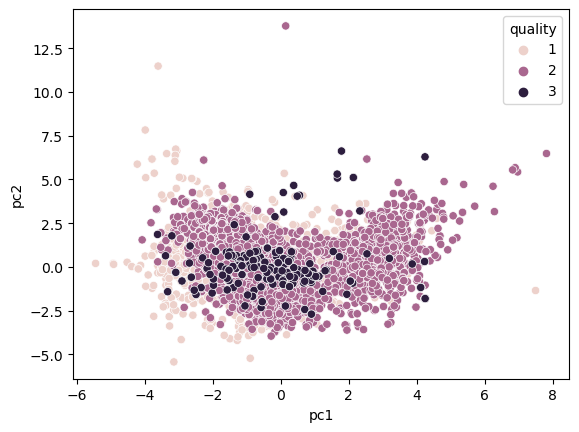

In [152]:
sns.scatterplot(x='pc1', y='pc2', hue='quality', data=final)


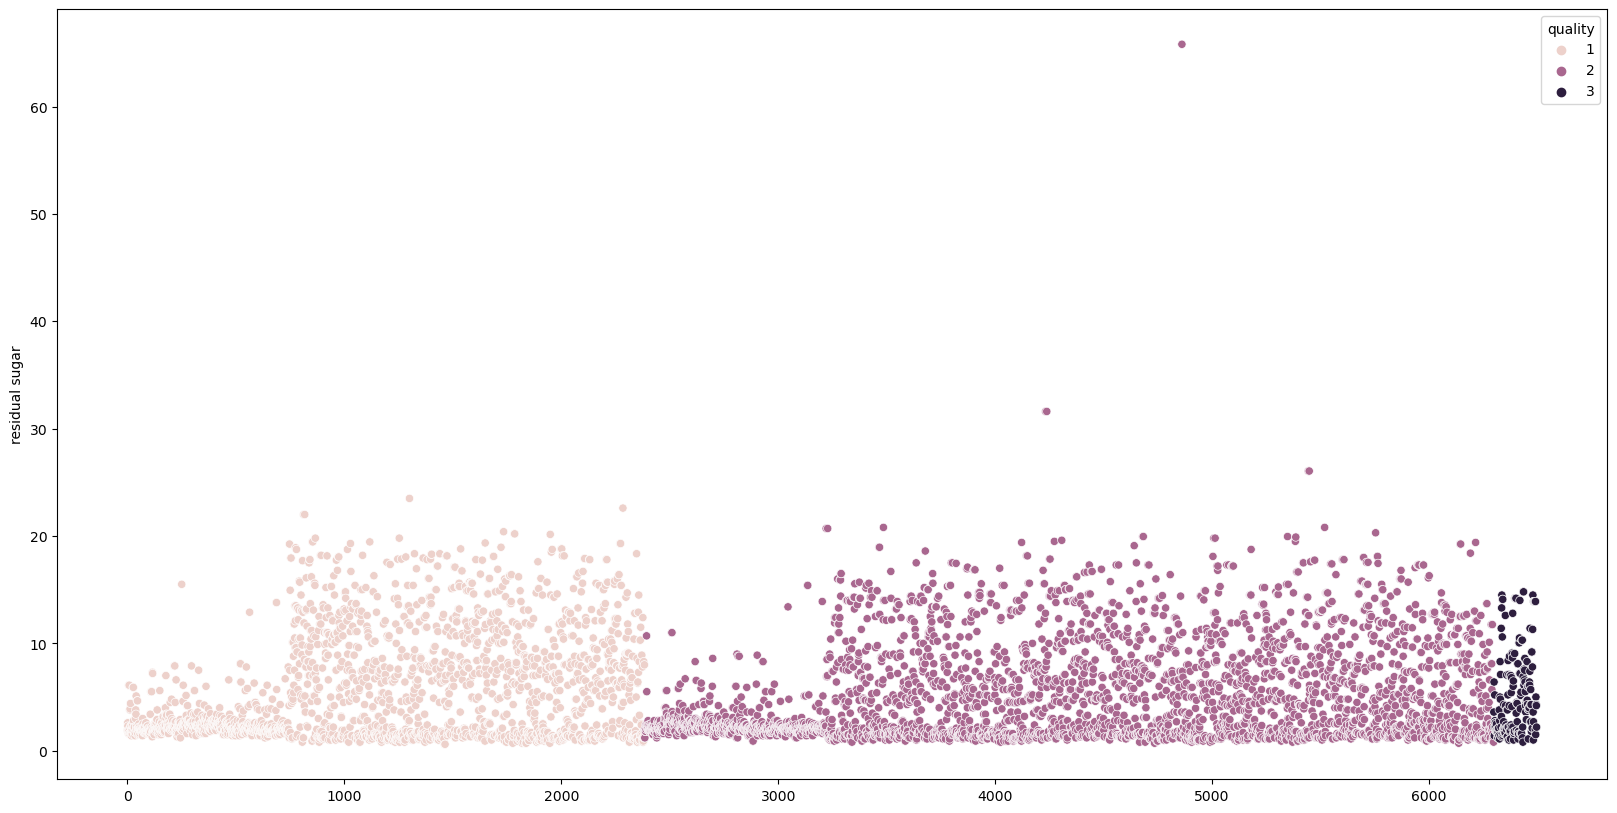

In [158]:
sns.scatterplot(data= final, x=final.index, y='residual sugar', hue='quality')


plt.gcf().set_size_inches(20,10)

In [159]:
final

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6492            5.2             0.300         0.34             1.5      0.038   
6493            6.4             0.320         0.25             5.0      0.055   
6494            4.4             0.320         0.39             4.3      0.030   
6495            3.9             0.225         0.40             4.2      0.030   
6496            5.8             0.280         0.34             2.2      0.037   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    11.0                  34.0  0.99780  3.51       0.56   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 18.0                  96.0  0.98942  3.56       0.48   
6493                 28.0                 138.0  0.99171  3.27       0.50   
6494                 31.0                 127.0  0.98904  3.46       0.36   
6495                 29.0                 118.0  0.98900  3.57       0.36   
6496                 24.0                 125.0  0.98986  3.36       0.33   

      alcohol  quality       pc1       pc2  
0         9.4        1 -2.839900  0.446147  
1         9.8        1 -2.541895  1.071394  
2         9.8        1 -2.601232  0.863667  
3         9.4        1 -2.839900  0.446147  
4         9.4        1 -2.674377  0.393915  
...       ...      ...       ...       ...  
6492     13.0        3 -2.689354  0.220610  
6493     12.4        3 -0.502654 -0.086257  
6494     12.8        3 -2.346029 -1.181076  
6495     12.8        3 -2.548798 -1.332685  
6496     12.8        3 -1.713687 -0.470538  

[6497 rows x 14 columns]

In [160]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
3         9.8        2  
4         9.4        1  
...       ...      ...  
6492     11.2        2  
6493      9.6        1  
6494      9.4        2  
6495     12.8        2  
6496     11.8        2  

[6497 rows x 12 columns]

In [161]:
df_merge

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
3         9.8        2  
4         9.4        1  
...       ...      ...  
6492     11.2        2  
6493      9.6        1  
6494      9.4        2  
6495     12.8        2  
6496     11.8        2  

[6497 rows x 12 columns]

In [167]:
df_merge

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
3         9.8        2  
4         9.4        1  
...       ...      ...  
6492     11.2        2  
6493      9.6        1  
6494      9.4        2  
6495     12.8        2  
6496     11.8        2  

[6497 rows x 12 columns]

In [169]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_data)
kmeans.inertia_

23592.518701311234

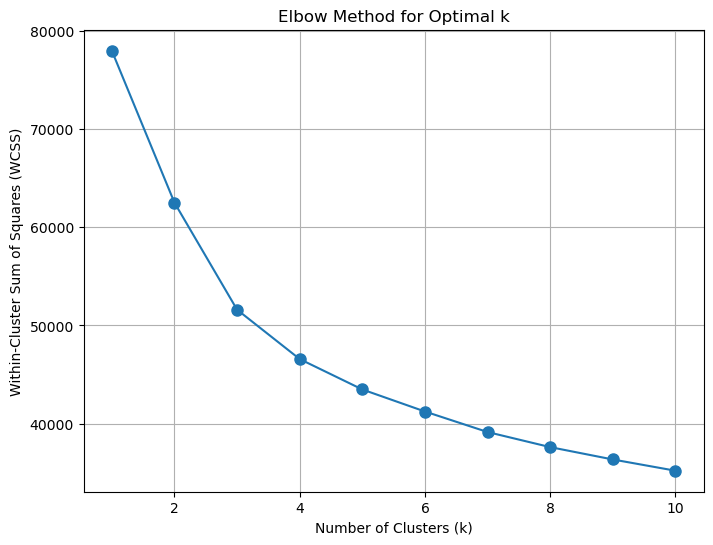

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_merge)

# Initialize empty lists to store WCSS values
wcss = []

# Try different values of k (e.g., from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', markersize=8)




plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [174]:
final

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6492            5.2             0.300         0.34             1.5      0.038   
6493            6.4             0.320         0.25             5.0      0.055   
6494            4.4             0.320         0.39             4.3      0.030   
6495            3.9             0.225         0.40             4.2      0.030   
6496            5.8             0.280         0.34             2.2      0.037   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    11.0                  34.0  0.99780  3.51       0.56   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 18.0                  96.0  0.98942  3.56       0.48   
6493                 28.0                 138.0  0.99171  3.27       0.50   
6494                 31.0                 127.0  0.98904  3.46       0.36   
6495                 29.0                 118.0  0.98900  3.57       0.36   
6496                 24.0                 125.0  0.98986  3.36       0.33   

      alcohol  quality       pc1       pc2  
0         9.4        1 -2.839900  0.446147  
1         9.8        1 -2.541895  1.071394  
2         9.8        1 -2.601232  0.863667  
3         9.4        1 -2.839900  0.446147  
4         9.4        1 -2.674377  0.393915  
...       ...      ...       ...       ...  
6492     13.0        3 -2.689354  0.220610  
6493     12.4        3 -0.502654 -0.086257  
6494     12.8        3 -2.346029 -1.181076  
6495     12.8        3 -2.548798 -1.332685  
6496     12.8        3 -1.713687 -0.470538  

[6497 rows x 14 columns]

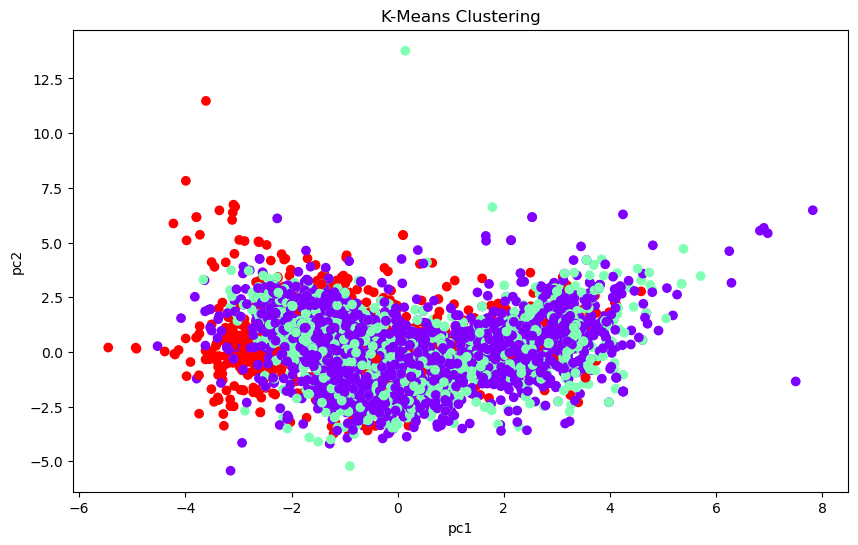

In [203]:
# Choose the number of clusters (K) - you can tune this parameter
k = 3

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=k, random_state=0)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_merge)

# Fit the model to your data
kmeans.fit(scaled_data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to your DataFrame
final['cluster'] = cluster_labels

# Visualize the clusters (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(final['pc1'], final['pc2'], c=final['cluster'], cmap='rainbow')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('K-Means Clustering')
plt.show()

In [204]:
final.groupby(['quality', 'cluster'])['cluster'].count()

quality  cluster
1        0           462
         1           374
         2          1548
2        0          2346
         1          1505
         2            64
3        0           145
         1            52
         2             1
Name: cluster, dtype: int64

In [205]:
final1 = final[final['quality'] == 1]

In [206]:
final1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3               7.4              0.70         0.00             1.9      0.076   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
2379            5.5              0.32         0.13             1.3      0.037   
2380            6.5              0.33         0.38             8.3      0.048   
2381            6.8              0.22         0.36             1.2      0.052   
2382            6.5              0.23         0.38             1.3      0.032   
2383            6.6              0.32         0.36             8.0      0.047   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    11.0                  34.0  0.99780  3.51       0.56   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
2379                 45.0                 156.0  0.99184  3.26       0.38   
2380                 68.0                 174.0  0.99492  3.14       0.50   
2381                 38.0                 127.0  0.99330  3.04       0.54   
2382                 29.0                 112.0  0.99298  3.29       0.54   
2383                 57.0                 168.0  0.99490  3.15       0.46   

      alcohol  quality       pc1       pc2  cluster  
0         9.4        1 -2.839900  0.446147        2  
1         9.8        1 -2.541895  1.071394        2  
2         9.8        1 -2.601232  0.863667        2  
3         9.4        1 -2.839900  0.446147        2  
4         9.4        1 -2.674377  0.393915        2  
...       ...      ...       ...       ...      ...  
2379     10.7        1  0.317477 -2.909383        0  
2380      9.6        1  2.100217 -0.307898        1  
2381      9.2        1  0.800129 -0.687934        1  
2382      9.7        1  0.112874 -1.360074        1  
2383      9.6        1  1.812744 -0.458916        1  

[2384 rows x 15 columns]

<Axes: xlabel='pc1', ylabel='pc2'>

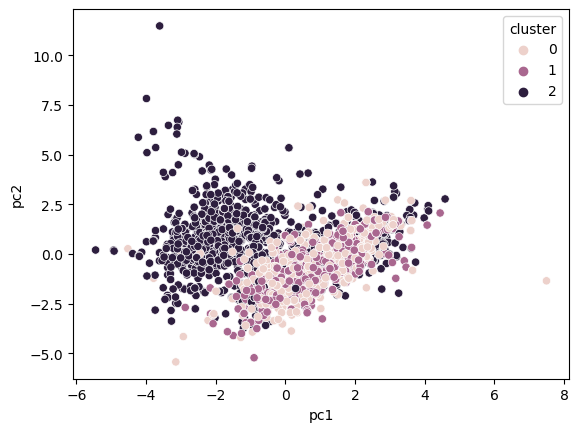

In [207]:
sns.scatterplot(data=final1, x='pc1', y='pc2', hue='cluster')


In [208]:
final

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6492            5.2             0.300         0.34             1.5      0.038   
6493            6.4             0.320         0.25             5.0      0.055   
6494            4.4             0.320         0.39             4.3      0.030   
6495            3.9             0.225         0.40             4.2      0.030   
6496            5.8             0.280         0.34             2.2      0.037   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    11.0                  34.0  0.99780  3.51       0.56   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 18.0                  96.0  0.98942  3.56       0.48   
6493                 28.0                 138.0  0.99171  3.27       0.50   
6494                 31.0                 127.0  0.98904  3.46       0.36   
6495                 29.0                 118.0  0.98900  3.57       0.36   
6496                 24.0                 125.0  0.98986  3.36       0.33   

      alcohol  quality       pc1       pc2  cluster  
0         9.4        1 -2.839900  0.446147        2  
1         9.8        1 -2.541895  1.071394        2  
2         9.8        1 -2.601232  0.863667        2  
3         9.4        1 -2.839900  0.446147        2  
4         9.4        1 -2.674377  0.393915        2  
...       ...      ...       ...       ...      ...  
6492     13.0        3 -2.689354  0.220610        0  
6493     12.4        3 -0.502654 -0.086257        1  
6494     12.8        3 -2.346029 -1.181076        0  
6495     12.8        3 -2.548798 -1.332685        0  
6496     12.8        3 -1.713687 -0.470538        0  

[6497 rows x 15 columns]

In [209]:
final.groupby(['cluster', 'quality'])['quality'].count()

cluster  quality
0        1           462
         2          2346
         3           145
1        1           374
         2          1505
         3            52
2        1          1548
         2            64
         3             1
Name: quality, dtype: int64

[0 0 0 ... 2 2 2]


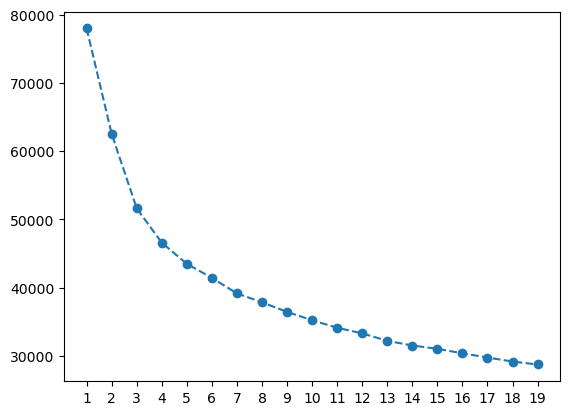

In [230]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
wcss = []
df_scal =  StandardScaler().fit(df_merge).transform(df_merge)

for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=12341)
    kmeans.fit(df_scal)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss, linestyle='--', marker='o')
plt.xticks(range(1, 20))

k=3
df_scal =  StandardScaler().fit(df_merge).transform(df_merge)
kmeans = KMeans(n_clusters=k, random_state=12341)
kmeans.fit(df_scal)
print(kmeans.labels_)

In [219]:
df_merge.drop('cluster', axis=1, inplace=True)

In [220]:
df_merge

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
3         9.8        2  
4         9.4        1  
...       ...      ...  
6492     11.2        2  
6493      9.6        1  
6494      9.4        2  
6495     12.8        2  
6496     11.8        2  

[6497 rows x 12 columns]